# ANÁLISIS DE SERIES DE TIEMPO

Conjuntos de valores que están organizados en orden cronológico

physiobankATM -> Página para datos clínicos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
url ='https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/ECG.csv'
df = pd.read_csv(url)
df.head()

,'Elapsed time','I','II','III','AVR','AVL','AVF','V1','V2','V3','V4','V5','V6'
0,'hh:mm:ss.mmm','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV'
1,'0:00.000',0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,'0:00.001',0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,'0:00.002',0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,'0:00.003',0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195


In [4]:
df.loc[0]

'Elapsed time'    'hh:mm:ss.mmm'
'I'                         'mV'
'II'                        'mV'
'III'                       'mV'
'AVR'                       'mV'
'AVL'                       'mV'
'AVF'                       'mV'
'V1'                        'mV'
'V2'                        'mV'
'V3'                        'mV'
'V4'                        'mV'
'V5'                        'mV'
'V6'                        'mV'
Name: 0, dtype: object

In [5]:
df.drop( labels = 0, inplace = True)

In [6]:
df.columns = ['Elapsed time', 'I', 'II', 'III', 
           'AVR', 'AVL', 'AVF',
       'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [7]:
df.head()

,Elapsed time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,'0:00.000',0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,'0:00.001',0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,'0:00.002',0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,'0:00.003',0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,'0:00.004',0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185


In [8]:
print(df.loc[1, 'II'])

0.260


In [9]:
type(df.loc[1, 'II'])

str

Cambio el formato de la columna a tipo float

In [10]:
df['II'] = pd.to_numeric(df['II'], downcast = 'float', errors = 'coerce')

In [11]:
type(df.loc[1, 'II'])

numpy.float32

In [12]:
print(df.loc[1, 'Elapsed time'])

'0:00.000'


In [13]:
type(df.loc[1, 'Elapsed time'])

str

In [14]:
df ['Elapsed time'] = df ['Elapsed time'].str.replace("'", "", regex = False)
df

,Elapsed time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,0:00.000,0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,0:00.001,0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,0:00.002,0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,0:00.003,0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,0:00.004,0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0:09.995,0.008,0.845,0.838,-0.425,-0.415,0.840,-0.685,-1.593,-0.790,2.275,1.863,1.135
9997,0:09.996,0.023,0.630,0.608,-0.325,-0.293,0.618,-0.685,-1.445,-0.803,2.198,1.748,1.035
9998,0:09.997,0.048,0.403,0.355,-0.225,-0.153,0.378,-0.713,-1.275,-0.813,2.040,1.568,0.903
9999,0:09.998,0.058,0.388,0.330,-0.223,-0.135,0.358,-0.723,-1.253,-0.803,2.008,1.538,0.885


In [15]:
print(df.loc[1, 'Elapsed time'])

0:00.000


In [16]:
df['Elapsed time'] = pd.to_datetime(df['Elapsed time'], format = '%M:%S.%f')#.dt.time

In [17]:
df

,Elapsed time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,1900-01-01 00:00:00.000,0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,1900-01-01 00:00:00.001,0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,1900-01-01 00:00:00.002,0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,1900-01-01 00:00:00.003,0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,1900-01-01 00:00:00.004,0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1900-01-01 00:00:09.995,0.008,0.845,0.838,-0.425,-0.415,0.840,-0.685,-1.593,-0.790,2.275,1.863,1.135
9997,1900-01-01 00:00:09.996,0.023,0.630,0.608,-0.325,-0.293,0.618,-0.685,-1.445,-0.803,2.198,1.748,1.035
9998,1900-01-01 00:00:09.997,0.048,0.403,0.355,-0.225,-0.153,0.378,-0.713,-1.275,-0.813,2.040,1.568,0.903
9999,1900-01-01 00:00:09.998,0.058,0.388,0.330,-0.223,-0.135,0.358,-0.723,-1.253,-0.803,2.008,1.538,0.885


In [18]:
type(df.loc[1, 'Elapsed time'])

pandas._libs.tslibs.timestamps.Timestamp

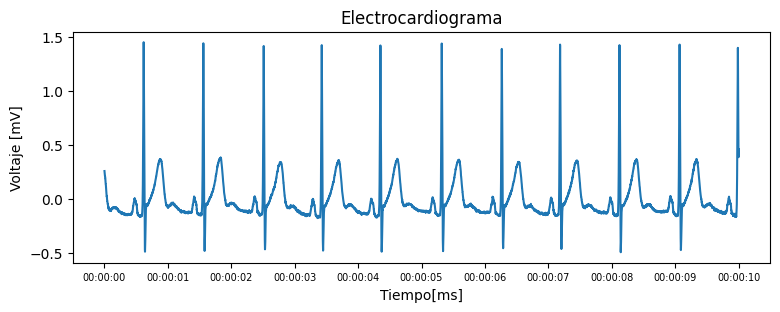

In [19]:
plt.figure( figsize = (9,3))
plt.plot(df['Elapsed time'], df.II)
plt.xticks(size = 7)
plt.xlabel('Tiempo[ms]')
plt.ylabel('Voltaje [mV]')
plt.title('Electrocardiograma')
plt.show()

¿Cómo hacer una animación?

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

In [21]:
df.columns

Index(['Elapsed time', 'I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3',
       'V4', 'V5', 'V6'],
      dtype='object')

In [22]:
x = df['Elapsed time'].values
y = df.II.values
N = len(df)

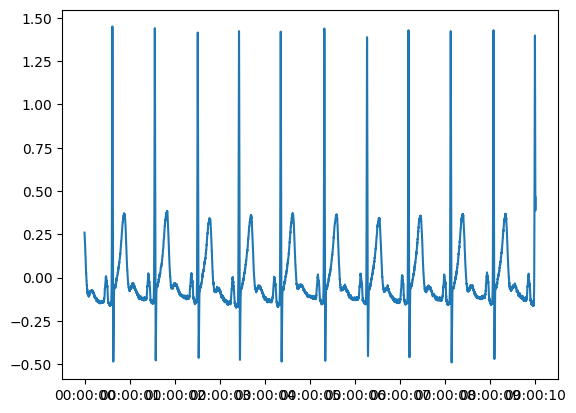

In [23]:
plt.plot(x,y)
plt.show()


Contruir la animación

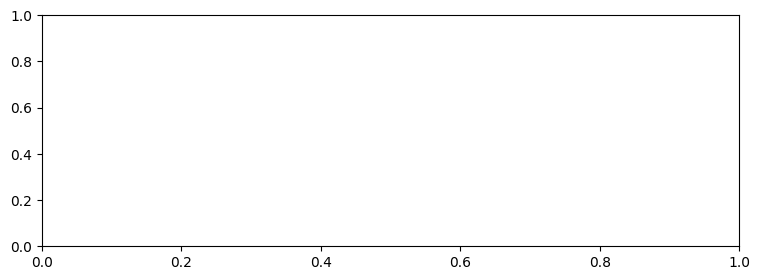

In [24]:
fig = plt.figure( figsize = (9,3) )
ax = fig.gca() # get current access

def actualizar(i):
    ax.clear()

    ax.plot(x[:i], y[:i])

In [33]:
anim = animation.FuncAnimation(fig, actualizar,
                               range(0, N, 10), interval = 30)


In [ ]:
HTML(anim.to_html5_video())